# Extraction

## From https://coinmarketcap.com

In [1]:
import urllib.request as urllib2
from bs4 import BeautifulSoup
import pandas as pd
import datetime
import csv

In [3]:
# Data since 2013/04/28 to 2020/06/07
today = datetime.date.today()
mktcap_page = 'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&amp;end='+"{:%Y%m%d}".format(today)
page = urllib2.urlopen(mktcap_page)
soup = BeautifulSoup(page, 'html.parser')
table = soup.find("table")
headings = [th.get_text().strip() for th in table.find("tr").find_all("td")]


In [25]:
headings = [x.replace('*','') for x in headings]
headings

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

In [28]:
datasets = []

for row in soup.find_all("tr")[1:]:
    dataset = dict(zip(headings, (tr.get_text() for tr in row.find_all("td"))))
    if len(dataset) > 1:
        datasets.append(dataset)

datasets[0]

{'Date': 'Jun 07, 2020',
 'Open': '9,653.00',
 'High': '9,768.50',
 'Low': '9,458.15',
 'Close': '9,758.85',
 'Volume': '25,015,250,846',
 'Market Cap': '179,540,253,701'}

In [27]:
my_df = pd.DataFrame(datasets)
my_df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jun 07, 2020","9,653.00","9,768.50","9,458.15","9,758.85","25,015,250,846","179,540,253,701"
1,"Jun 06, 2020","9,664.90","9,773.43","9,591.02","9,653.68","20,438,419,222","177,595,657,884"
2,"Jun 05, 2020","9,800.22","9,869.24","9,663.22","9,665.53","23,509,628,646","177,801,825,145"
3,"Jun 04, 2020","9,655.85","9,887.61","9,525.25","9,800.64","25,921,805,072","180,276,153,545"
4,"Jun 03, 2020","9,533.76","9,682.86","9,471.85","9,656.72","25,007,459,262","177,619,631,126"


In [30]:
full_data = my_df.set_index('Date')
#full_data = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']]
full_data.to_csv('full_data_btc.csv', index=True, header=True)

In [32]:
full_data.head(10)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
"Jun 07, 2020","9,653.00","9,768.50","9,458.15","9,758.85","25,015,250,846","179,540,253,701"
"Jun 06, 2020","9,664.90","9,773.43","9,591.02","9,653.68","20,438,419,222","177,595,657,884"
"Jun 05, 2020","9,800.22","9,869.24","9,663.22","9,665.53","23,509,628,646","177,801,825,145"
"Jun 04, 2020","9,655.85","9,887.61","9,525.25","9,800.64","25,921,805,072","180,276,153,545"
"Jun 03, 2020","9,533.76","9,682.86","9,471.85","9,656.72","25,007,459,262","177,619,631,126"
"Jun 02, 2020","10,162.97","10,182.34","9,460.57","9,529.80","39,137,252,109","175,277,218,229"
"Jun 01, 2020","9,463.61","10,199.56","9,450.90","10,167.27","35,198,901,068","186,993,405,740"
"May 31, 2020","9,700.11","9,700.34","9,432.30","9,461.06","27,773,290,299","173,997,151,930"
"May 30, 2020","9,438.91","9,704.03","9,366.73","9,700.41","32,722,975,141","178,390,129,758"


In [34]:
full_data.shape

(2598, 6)

In [53]:
full_data.dtypes

Open          object
High          object
Low           object
Close         object
Volume        object
Market Cap    object
dtype: object

In [67]:
def obj_to_int(x):
    x = x.replace(',','')
    return float(x)
full_data['Close'] = full_data['Close'].apply(obj_to_int)
full_data['Open'] = full_data['Open'].apply(obj_to_int)
full_data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
"Jun 07, 2020",9653.00,"9,768.50","9,458.15",9758.85,"25,015,250,846","179,540,253,701"
"Jun 06, 2020",9664.90,"9,773.43","9,591.02",9653.68,"20,438,419,222","177,595,657,884"
"Jun 05, 2020",9800.22,"9,869.24","9,663.22",9665.53,"23,509,628,646","177,801,825,145"
"Jun 04, 2020",9655.85,"9,887.61","9,525.25",9800.64,"25,921,805,072","180,276,153,545"
"Jun 03, 2020",9533.76,"9,682.86","9,471.85",9656.72,"25,007,459,262","177,619,631,126"


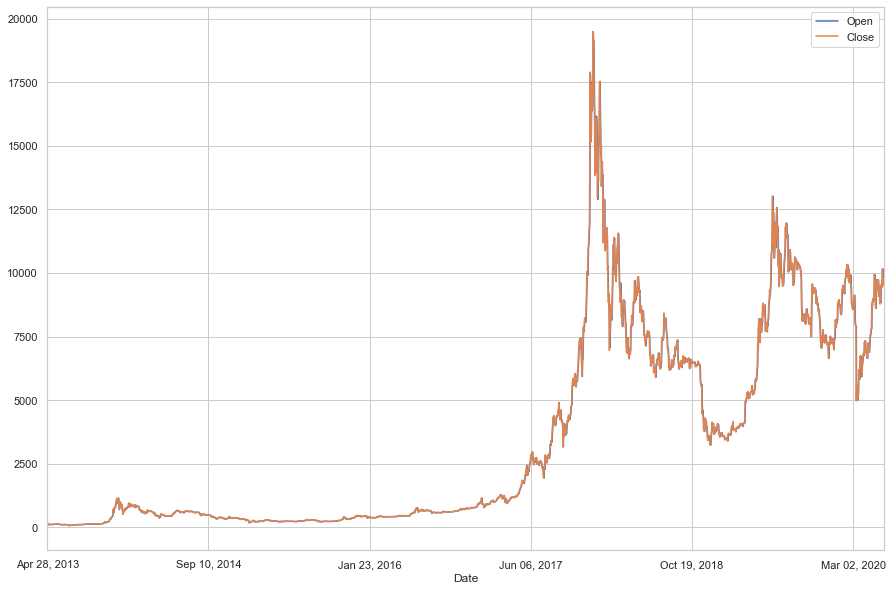

In [70]:
full_data[['Open','Close']][::-1].plot(grid=True, figsize=(15, 10))